In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression

In [2]:
!pip install pydrive

## Google Drive **Import**

In [0]:
from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials



In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'1yQb5bLMgDCpH1Um2P_YUUbhuhmZpIndF'}) # replace the id with id of file you want to access
downloaded.GetContentFile('train.csv')  

#3. Read file as panda dataframe
import pandas as pd
train = pd.read_csv('train.csv') 

In [0]:
#2. Get the file
downloaded = drive.CreateFile({'id':'1go0P5Gc9dpT2lkKlN5RnueqnnU7119ym'}) # replace the id with id of file you want to access
downloaded.GetContentFile('test.csv')  

#3. Read file as panda dataframe
import pandas as pd
test = pd.read_csv('test.csv') 

In [0]:
train = train.sort_values(['Age'], ascending=[False])


# Data Cleaning

In [0]:
train.drop(['PassengerId'], inplace=True, axis=1)
train.drop(['Ticket'], inplace=True, axis=1)

In [0]:
test.drop(['Ticket'], inplace=True, axis=1)

## Age

In [0]:
x=train['Age'].mean()-train['Age'].mode()
x=x/2

In [10]:
print(x)

0    2.849559
dtype: float64


In [11]:
y=train['Age'].mean()-x
y

0    26.849559
dtype: float64

In [12]:
z=train['Age'].mode()+x
z

0    26.849559
dtype: float64

In [13]:
train['Age'].mode()+train['Age'].mean()-train['Age'].mode()

0    29.699118
dtype: float64

In [14]:
train['Age'].shape

(891,)

In [0]:
#train['Age']=train['Age'].fillna(train['Age'].mode()+train['Age'].mean()-train['Age'].mode())


In [0]:
train['Age']=train['Age'].fillna((train['Age'].mean()-2.85))

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 630 to 888
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


## Cabin

In [0]:
train["Deck"] = train["Cabin"].str.slice(0,1)

In [0]:
train['Deck']=train['Deck'].fillna('N')

In [0]:
test["Deck"] = test["Cabin"].str.slice(0,1)

In [0]:
train.drop(['Cabin'], inplace=True, axis=1)

In [0]:
test.drop(['Cabin'], inplace=True, axis=1)

In [22]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,30.0000,S,A
851,0,3,"Svensson, Mr. Johan",male,74.0,0,0,7.7750,S,N
493,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,49.5042,C,N
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,34.6542,C,A
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,7.7500,Q,N


## Embarked

In [23]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN,B
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN,B


In [0]:
train['Embarked']=train['Embarked'].fillna('N')

In [0]:
test.drop(['Embarked'], inplace=True, axis=1)

In [0]:
train.drop(['Embarked'], inplace=True, axis=1)

# Feature Engineering

## Pclass

*Encode to avoid model reading as ordinal data*


In [0]:
train['Class1'] = train['Pclass'].apply( lambda x: 1 if x == 1 else 0)
train['Class2'] = train['Pclass'].apply( lambda x: 1 if x == 2 else 0)
train['Class3'] = train['Pclass'].apply( lambda x: 1 if x == 3 else 0)


In [0]:
test['Class1'] = test['Pclass'].apply( lambda x: 1 if x == 1 else 0)
test['Class2'] = test['Pclass'].apply( lambda x: 1 if x == 2 else 0)
test['Class3'] = test['Pclass'].apply( lambda x: 1 if x == 3 else 0)


In [30]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Deck,Class1,Class2,Class3
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,30.0000,A,1,0,0
851,0,3,"Svensson, Mr. Johan",male,74.0,0,0,7.7750,N,0,0,1
493,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,49.5042,N,1,0,0
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,34.6542,A,1,0,0
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,7.7500,N,0,0,1


## Age
*Creating age groups*

In [0]:
#train['Young'] = train['Age'].apply(lambda x: 1 if x >= 0 and x <= 18 else 0)
#train['Youth'] = train['Age'].apply(lambda x: 1 if x >= 18 and x <= 35 else 0)
#train['Adult'] = train['Age'].apply(lambda x: 1 if x >= 36 and x <= 60 else 0)
#train['Elderly'] = train['Age'].apply(lambda x: 1 if x >= 61 else 0)

In [0]:
#test['Young'] = test['Age'].apply(lambda x: 1 if x >= 0 and x <= 18 else 0)
#test['Youth'] = test['Age'].apply(lambda x: 1 if x >= 18 and x <= 35 else 0)
#test['Adult'] = test['Age'].apply(lambda x: 1 if x >= 36 and x <= 60 else 0)
#test['Elderly'] = test['Age'].apply(lambda x: 1 if x >= 61 else 0)

## Name
*Extract titles from names*

In [0]:
import re

train['Title'] = train.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

In [0]:
train['Title'] = train['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
train['Title'] = train['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')


In [0]:
test['Title'] = test.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
test['Title'] = test['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
test['Title'] = test['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')


In [0]:
train.drop(['Name'],inplace=True, axis=1)


In [0]:
test.drop(['Name'],inplace=True, axis=1)

## SibSp + Parch
*Combine SibSp and Parch to find if passenger had family on board*

In [0]:
train['Family'] =  train["Parch"] + train["SibSp"]
train['Family'] = train['Family'].apply( lambda x: 1 if x > 0 else 0)

In [0]:
train.drop(['SibSp'],inplace=True, axis=1)
train.drop(['Parch'],inplace=True, axis=1)

In [0]:
test['Family'] =  test["Parch"] + test["SibSp"]
test['Family'] = test['Family'].apply( lambda x: 1 if x > 0 else 0)

In [0]:
test.drop(['SibSp'],inplace=True, axis=1)
test.drop(['Parch'],inplace=True, axis=1)

In [42]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Deck,Class1,Class2,Class3,Title,Family
630,1,1,male,80.0,30.0000,A,1,0,0,Mr,0
851,0,3,male,74.0,7.7750,N,0,0,1,Mr,0
493,0,1,male,71.0,49.5042,N,1,0,0,Mr,0
96,0,1,male,71.0,34.6542,A,1,0,0,Mr,0
116,0,3,male,70.5,7.7500,N,0,0,1,Mr,0


# Encoding

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 630 to 888
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Fare        891 non-null float64
Deck        891 non-null object
Class1      891 non-null int64
Class2      891 non-null int64
Class3      891 non-null int64
Title       891 non-null object
Family      891 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 83.5+ KB


## Train Set

In [0]:
## Sex 

train = train.sort_values(['Sex'], ascending=[True])

train["Sex"] = pd.Categorical(train["Sex"])
sex_categories = train.Sex.cat.categories
train["Sex"] = train.Sex.cat.codes

In [45]:
## Embarked 

train = train.sort_values(['Embarked'], ascending=[True])

train["Embarked"] = pd.Categorical(train["Embarked"])
Embarked_categories = train.Embarked.cat.categories
train["Embarked"] = train.Embarked.cat.codes

KeyError: ignored

In [0]:
## Deck 

train = train.sort_values(['Deck'], ascending=[True])

train["Deck"] = pd.Categorical(train["Deck"])
Deck_categories = train.Deck.cat.categories
train["Deck"] = train.Deck.cat.codes

In [0]:
## Title 

train = train.sort_values(['Title'], ascending=[True])

train["Title"] = pd.Categorical(train["Title"])
title_categories = train.Title.cat.categories
train["Title"] = train.Title.cat.codes

## Test Set

In [0]:
## Sex 

test = test.sort_values(['Sex'], ascending=[True])

test["Sex"] = pd.Categorical(test["Sex"])
sex_categories = test.Sex.cat.categories
test["Sex"] = test.Sex.cat.codes

In [0]:
## Embarked 

#test = test.sort_values(['Embarked'], ascending=[True])

#test["Embarked"] = pd.Categorical(test["Embarked"])
#Embarked_categories = test.Embarked.cat.categories
#test["Embarked"] = test.Embarked.cat.codes

In [0]:
## Deck 

test = test.sort_values(['Deck'], ascending=[True])

test["Deck"] = pd.Categorical(test["Deck"])
Deck_categories = test.Deck.cat.categories
test["Deck"] = test.Deck.cat.codes

In [0]:
## Title 

test = test.sort_values(['Title'], ascending=[True])

test["Title"] = pd.Categorical(test["Title"])
title_categories = test.Title.cat.categories
test["Title"] = test.Title.cat.codes

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 417 to 202
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int8
Age            332 non-null float64
Fare           417 non-null float64
Deck           418 non-null int8
Class1         418 non-null int64
Class2         418 non-null int64
Class3         418 non-null int64
Title          418 non-null int8
Family         418 non-null int64
dtypes: float64(2), int64(6), int8(3)
memory usage: 30.6 KB


# Distribution

In [0]:

#print("skewness: %f" % train['Elderly'].skew())
#print("kurtosis: %f" % train['Elderly'].kurt())

In [0]:
#Kernel Density plot
#sb.distplot(train.Fare,fit=norm);
#plt.ylabel=('Frequency')
#plt.title=('Price distribution');
#Get the fitted parameters used by the function
#(mu,sigma)= norm.fit(train['Fare']);



#QQ plot
#fig =plt.figure()
#res =stats. probplot(train['Fare'], plot=plt)
#plt.show()

# Normalization

*Fare, Elderly*

In [0]:
train["Fare"] = np.log1p(train["Fare"])

In [0]:
#train["Elderly"] = np.log1p(train["Elderly"])

# Correlation Matrix

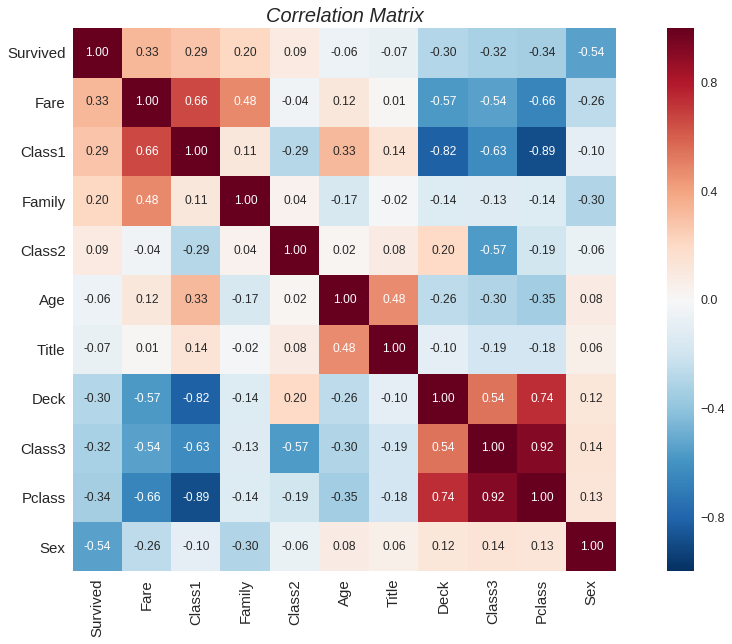

In [58]:
corrmat = train.corr()
cols = corrmat.nlargest(21, 'Survived')['Survived'].index #specify number of columns to display i.e 21
f, ax = plt.subplots(figsize=(18, 10)) #size of matrix
cm = np.corrcoef(train[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0, size=15)
plt.xticks(rotation=90, size=15)
plt.title("Correlation Matrix",style='oblique', size= 20)
plt.show()



# Gradient Boosting

In [0]:
from sklearn.ensemble import GradientBoostingClassifier 

In [0]:
gbr=GradientBoostingClassifier(n_estimators= 110, criterion="mae", min_samples_split = 2, learning_rate = 0.2, max_depth=3)

In [0]:
X = train.drop(["Survived"], axis=1)
y = train.Survived

In [62]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Deck', 'Class1', 'Class2', 'Class3',
       'Title', 'Family'],
      dtype='object')

In [63]:
gbr.fit(X,y)

GradientBoostingClassifier(criterion='mae', init=None, learning_rate=0.2,
              loss='deviance', max_depth=3, max_features=None,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=110, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [0]:
preds_train_set = gbr.predict(X)



In [65]:
from sklearn.metrics import mean_absolute_error

print (mean_absolute_error(preds_train_set,y))

0.16835016835016836


# Feature Importance

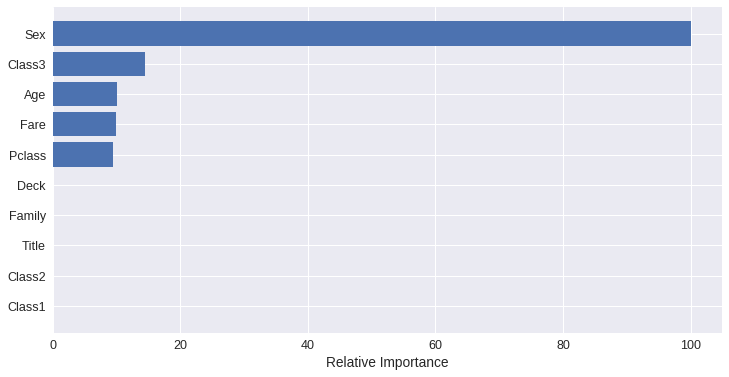

In [66]:
import matplotlib.pyplot as plt
# Plot feature importance
feature_importance = gbr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12,6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
#plt.title('Variable Importance')
plt.show()

# XGB

In [0]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [0]:
xgb = XGBClassifier(
 n_estimators= 110, criterion="mae", min_samples_split = 2, learning_rate = 0.2, max_depth=3
 )

In [93]:
xgb.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, criterion='mae', gamma=0, learning_rate=0.2,
       max_delta_step=0, max_depth=3, min_child_weight=1,
       min_samples_split=2, missing=None, n_estimators=110, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [94]:
preds_train_set = xgb.predict(X)



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [95]:
from sklearn.metrics import mean_absolute_error

print (mean_absolute_error(preds_train_set,y))

0.09090909090909091


# Prediction

In [67]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Deck', 'Class1',
       'Class2', 'Class3', 'Title', 'Family'],
      dtype='object')

In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 417 to 202
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int8
Age            332 non-null float64
Fare           417 non-null float64
Deck           418 non-null int8
Class1         418 non-null int64
Class2         418 non-null int64
Class3         418 non-null int64
Title          418 non-null int8
Family         418 non-null int64
dtypes: float64(2), int64(6), int8(3)
memory usage: 30.6 KB


In [69]:
test['Age'].mode()

0    21.0
1    24.0
dtype: float64

In [0]:
y=test['Age'].mean()-test['Age'].mode()
y=y/2


In [71]:
print(y)

0    4.636295
1    3.136295
dtype: float64


In [0]:
test['Age']=train['Age'].fillna((test['Age'].mean()-3.89))

In [0]:
test['Fare']=train['Fare'].fillna(test['Fare'].mean())

In [96]:
X_test = test.drop(['PassengerId'], axis=1)
test_set_prediction = xgb.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [0]:
d = {'PassengerId': test["PassengerId"], 'Survived': test_set_prediction}
df_predictions = pd.DataFrame(data=d)
df_predictions = df_predictions[['PassengerId','Survived']]


In [0]:
df_predictions[df_predictions<0]=0

In [0]:
file=df_predictions.to_csv('t_prediction3.csv', index=False) #save to csv file


In [100]:
df_predictions.shape

(418, 2)